In [188]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [343]:
df = pd.read_csv(r'../Final Project - Time Series Forecasting/train.csv', index_col= 'date', parse_dates= True)

In [344]:
df.isnull().sum()

store    0
item     0
sales    0
dtype: int64

In [342]:
#pd.date_range(start = '2013-01-01', end = '2017-12-31' ).difference(df.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

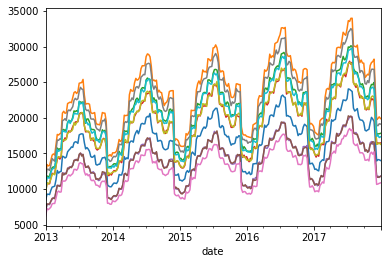

In [302]:
for i in range(1,11): 
    df[df['store']==i]['sales'].resample('W').sum().plot()

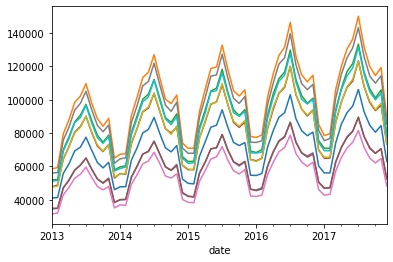

In [303]:
for i in range(1,11): 
    df[df['store']==i]['sales'].resample('M').sum().plot()

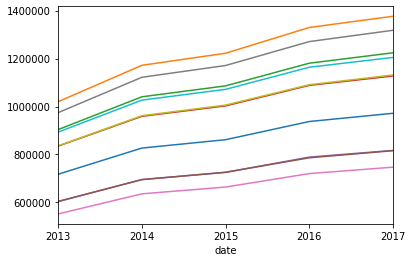

In [304]:
for i in range(1,11): 
    df[df['store']==i]['sales'].resample('Y').sum().plot()

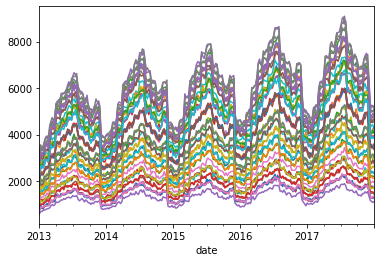

In [305]:
for i in range(1,51): 
    df[df['item']==i]['sales'].resample('W').sum().plot()

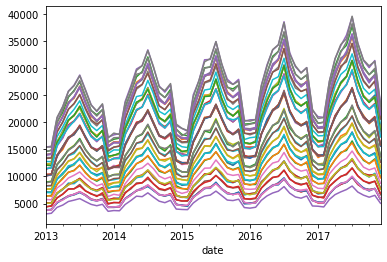

In [306]:
for i in range(1,51): 
    df[df['item']==i]['sales'].resample('M').sum().plot()

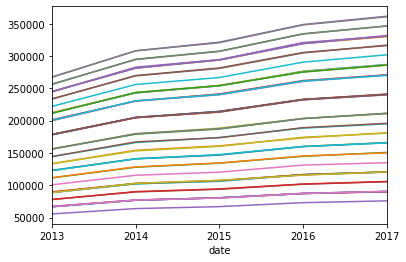

In [307]:
for i in range(1,51): 
    df[df['item']==i]['sales'].resample('Y').sum().plot()

### Deeper dive into the weekly trend by looking at a segment

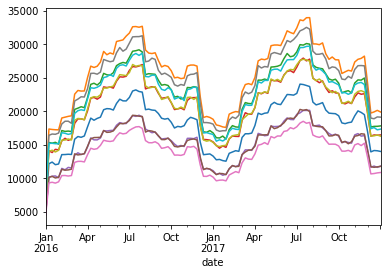

In [308]:
df1 = df['2016-01-01':'2017-12-31']
for i in range(1,11): 
    df1[df1['store']==i]['sales'].resample('W').sum().plot()

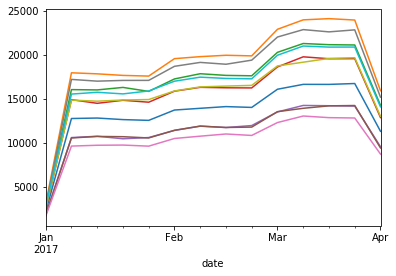

In [309]:
df2 = df['2017-01-01':'2017-03-31']
for i in range(1,11): 
    df2[df2['store']==i]['sales'].resample('W').sum().plot()

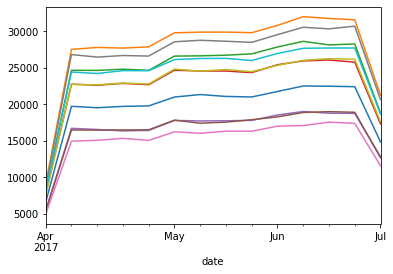

In [310]:
df3 = df['2017-04-01':'2017-06-30']
for i in range(1,11): 
    df3[df3['store']==i]['sales'].resample('W').sum().plot()

In [392]:
store_1 = df[(df['store']==1) & (df['item']==1)][['sales']]
store_1.index.freq = 'D'
store_1

,sales
date,
2013-01-01,13
2013-01-02,11
2013-01-03,14
2013-01-04,13
2013-01-05,10
...,...
2017-12-27,14
2017-12-28,19
2017-12-29,15


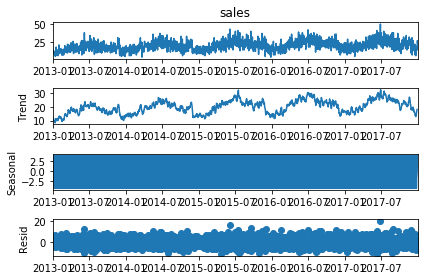

In [393]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(store_1['sales'], model='additive')
result.plot();

Lets zoom in on each of these: 

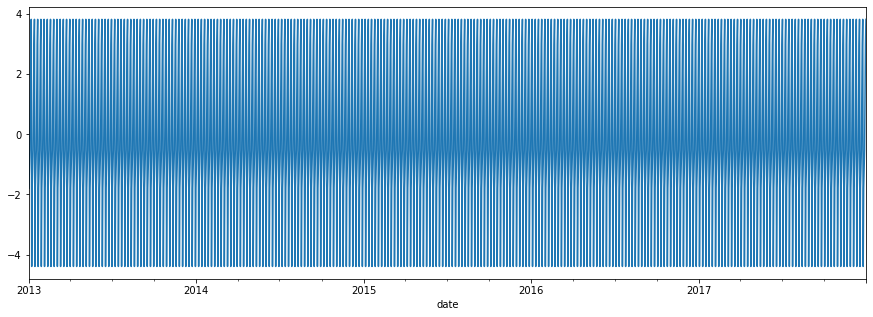

In [394]:
result.seasonal.plot(figsize = (15,5))

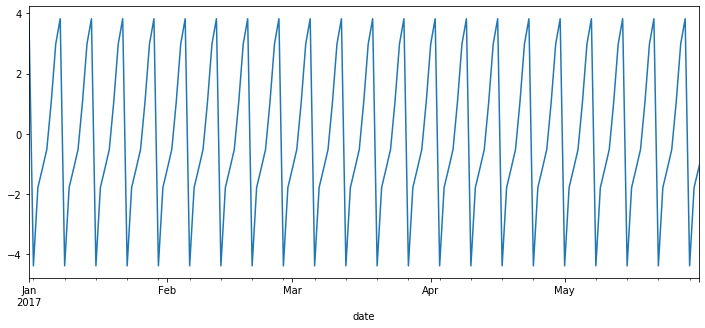

In [395]:
result.seasonal.plot(figsize = (12,5), xlim = ('2017-01-01','2017-05-31'))

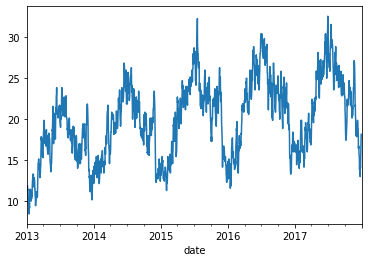

In [396]:
result.trend.plot()

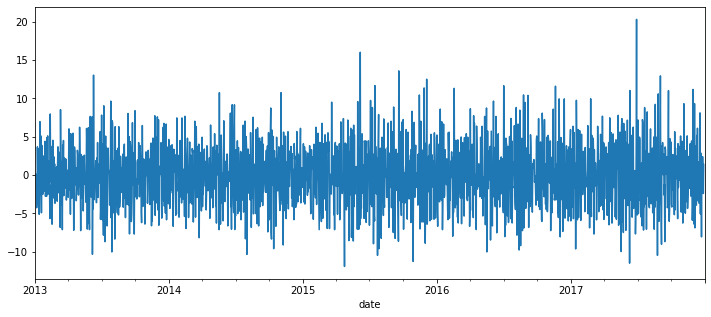

In [397]:
result.resid.plot(figsize = (12,5))

In [398]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

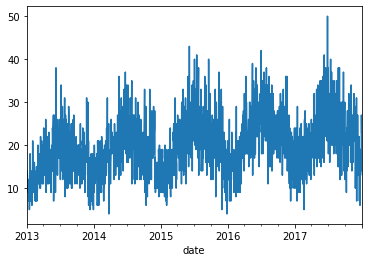

In [399]:
store_1['sales'].plot()

In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(store_1['sales'], lag = 40);

NameError: name 'store_1' is not defined

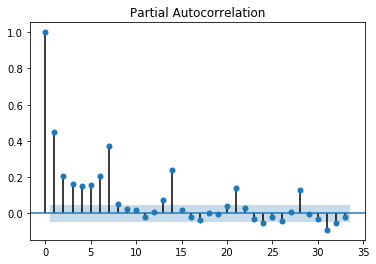

In [401]:
plot_pacf(store_1['sales']);

In [402]:
auto_arima(store_1['sales'], seasonal= True, m=7).summary()

C:\Users\chris\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\chris\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\chris\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\chris\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressi

C:\Users\chris\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\chris\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\chris\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1826
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 7)   Log Likelihood               -5415.497
Date:                             Wed, 06 May 2020   AIC                          10844.995
Time:                                     10:31:02   BIC                          10883.560
Sample:                                          0   HQIC                         10859.221
                                            - 1826                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.659e-06      0.000     -0.013      0.990      -0.000       0.000
ar.L1         -0.7875      0.191     -4.123      0.000      -1.162      -0.413
ma.L1         -0.0822      0.181     -0.454      0.650      -0.437       0.273
ma.L2         -0.7286      0.159     -4.582      0.000      -1.040      -0.417
ar.S.L7        0.9991      0.001    882.284      0.000       0.997       1.001
ma.S.L7       -0.9841      0.008   -116.506      0.000      -1.001      -0.968
sigma2        21.7482      0.666     32.648      0.000      20.443      23.054
===================================================================================
Ljung-Box (Q):                       44.19   Jarque-Bera (JB):                23.98
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [365]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")
        
adf_test(store_1['sales'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -2.984077
p-value                    0.036408
# lags used               22.000000
# observations          1803.000000
critical value (1%)       -3.433982
critical value (5%)       -2.863144
critical value (10%)      -2.567624
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [403]:
train = store_1.iloc[:1370]
test = store_1.iloc[1370:]

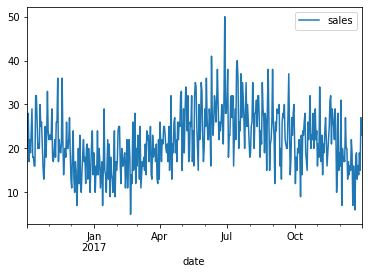

In [404]:
test.plot()

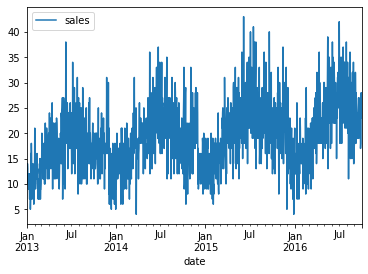

In [405]:
train.plot()

In [367]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 456 entries, 2016-10-02 to 2017-12-31
Freq: D
Data columns (total 1 columns):
sales    456 non-null int64
dtypes: int64(1)
memory usage: 7.1 KB


In [431]:
model = SARIMAX(train, order=(6, 1, 0), seasonal_order=(0, 0, 0, 7), enforce_invertibility= False, enforce_stationarity=False, initialization='approximate_diffuse')

In [432]:
results = model.fit()

In [433]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1370
Model:               SARIMAX(6, 1, 0)   Log Likelihood               -4203.096
Date:                Wed, 06 May 2020   AIC                           8420.193
Time:                        11:03:29   BIC                           8456.751
Sample:                    01-01-2013   HQIC                          8433.874
                         - 10-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8216      0.024    -33.944      0.000      -0.869      -0.774
ar.L2         -0.7486      0.027    -27.242      0.000      -0.802      -0.695
ar.L3         -0.6818      0.029    -23.506      0.000      -0.739      -0.625
ar.L4         -0.6158      0.031    -20.104      0.000      -0.676      -0.556
ar.L5         -0.5233      0.029    -18.112      0.000      -0.580      -0.467
ar.L6         -0.3919      0.024    -16.338      0.000      -0.439      -0.345
sigma2        25.8038      0.895     28.833      0.000      24.050      27.558
===================================================================================
Ljung-Box (Q):                      147.14   Jarque-Bera (JB):                14.78
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.51   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [434]:
start = len(train)
end = len(train) + len(test) - 1

precitions = results.predict(start, end, typ = 'levels').rename('SARIMAX Predictions')

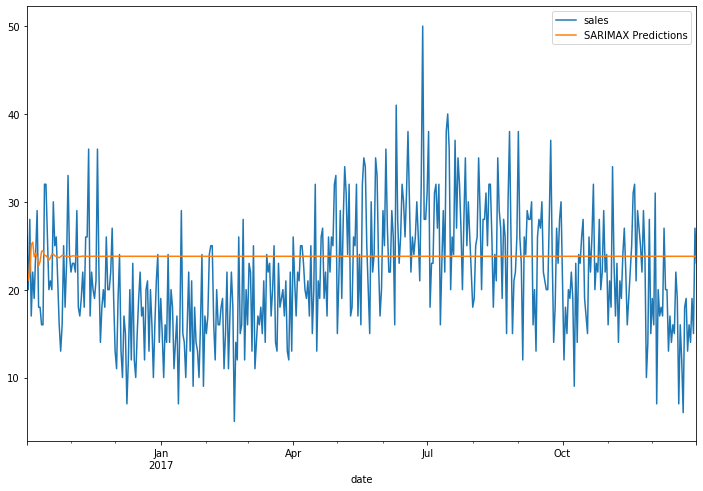

In [435]:
test['sales'].plot(legend = True, figsize = (12,8))
precitions.plot(legend = True)